<a href="https://colab.research.google.com/github/vramamani/vr_reva/blob/master/Tweets_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentimental Ananlysis of Tweets using different Modeling Techniques

In [0]:
#import nessassary packages
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns

In [8]:
from google.colab import files
uploaded=files.upload()

Saving TweetSent.csv to TweetSent.csv


In [0]:
df = pd.read_csv('TweetSent.csv')

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Data Exploration

In [13]:
#Retreiving the first 5 observations
df.head()

,Tweet,Category
0,Not Available,negative
1,IOS 9 App Transport Security. Mm need to check...,neutral
2,"Mar if you have an iOS device, you should down...",neutral
3,@jimmie_vanagon my phone does not run on lates...,negative
4,Not sure how to start your publication on iOS?...,positive


In [14]:
#Retreiving the last 5 observations
df.tail()

,Tweet,Category
5963,"Ok ed let's do this, Zlatan, greizmann and Lap...",positive
5964,Goal level: Zlatan 90k by Friday? = Posting e...,neutral
5965,@YouAreMyArsenal Wouldn't surprise me if we en...,neutral
5966,Rib injury for Zlatan against Russia is a big ...,neutral
5967,Noooooo! I was hoping to see Zlatan being Zlat...,neutral


In [15]:
print ('Overall data summary')
df.describe()

Overall data summary


,Tweet,Category
count,5968,5968
unique,5418,4
top,Not Available,positive
freq,546,2888


Data Cleaning and pre-processing

In [16]:
# library to clean data 
import re  
  
# Natural Language Tool Kit 
import nltk  
  
nltk.download('stopwords') 
  
# to remove stopword 
from nltk.corpus import stopwords 
  
# for Stemming propose  
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
df.shape

(5968, 2)

Tokenize,SWR,Stemming and Normalization

In [0]:
corpus = [] 
# 5967 (reviews) rows to clean 
for i in range(0, 5967):  
      
    # column : "Review", row ith 
    Tweet = re.sub('[^a-zA-Z]', ' ', df['Tweet'][i])  
      
    # convert all cases to lower cases 
    Tweet = Tweet.lower()  
      
    # split to array(default delimiter is " ") 
    Tweet = Tweet.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
    # loop for stemming each word 
    # in string array at ith row     
    Tweet = [ps.stem(word) for word in Tweet 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements 
    # to create back into a string 
    Tweet = ' '.join(Tweet)   
      
    # append each string to create 
    # array of clean text  
    corpus.append(Tweet)

Corpus of Cleaned text

In [20]:
corpus

['avail',
 'io app transport secur mm need check rd parti network pod support http co fmtcfuadgj',
 'mar io devic download app http co gl tn udnd',
 'jimmi vanagon phone run latest io may account problem day time replac',
 'sure start public io live help ask anyth session today friday http co kpqqgjjh x',
 'two dollar tuesday forklift quickkey io suit page today http co bnmfoeacw',
 'alreadi sign test io game now chanc http co ezhiu edpq',
 'youtub game offici launch web android io august youtub final go r http co qbhya kawp webseri',
 'youtub game launch tomorrow io android app go head head twitch http co yzoattoejc io game',
 'astril yashan bbc bbcchines vpn access io may limit china militari parad chanc chat',
 'parkrun app io download great app easier access info amp readi saturday run http co zyofhzerio',
 'today youtubegam launch app io android devic us uk need know http co kf dgnhx b',
 'got project want work need help swift need excus hang io dev sat hang us http co puwskbdfw',

Visualizing text: WordCloud and Word Frequency

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [0]:
#Creating the string text file for visualizing in word cloud
def comment(token):
    comment_words = ' '
    for word in token:
        comment_words = comment_words + word + ' '
    return comment_words

In [0]:
cleaned_text = comment(corpus)

In [24]:
cleaned_text

' avail io app transport secur mm need check rd parti network pod support http co fmtcfuadgj mar io devic download app http co gl tn udnd jimmi vanagon phone run latest io may account problem day time replac sure start public io live help ask anyth session today friday http co kpqqgjjh x two dollar tuesday forklift quickkey io suit page today http co bnmfoeacw alreadi sign test io game now chanc http co ezhiu edpq youtub game offici launch web android io august youtub final go r http co qbhya kawp webseri youtub game launch tomorrow io android app go head head twitch http co yzoattoejc io game astril yashan bbc bbcchines vpn access io may limit china militari parad chanc chat parkrun app io download great app easier access info amp readi saturday run http co zyofhzerio today youtubegam launch app io android devic us uk need know http co kf dgnhx b got project want work need help swift need excus hang io dev sat hang us http co puwskbdfw met io develop today may go crossskyhigh go io sa

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(cleaned_text)

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

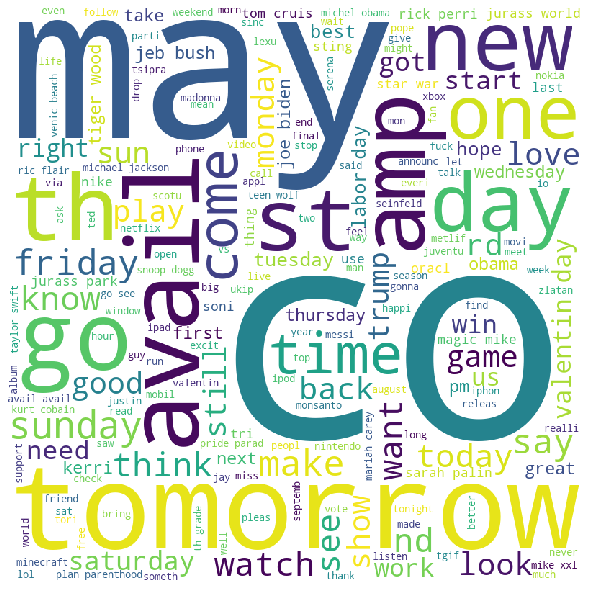

In [26]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

from the above cloud we can see that "co", "may", and "avail" are the most occured words

Word Frequency Visualization

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
#Creating tokenized string for plotting word frequency distribution
token_list1 = nltk.word_tokenize(cleaned_text)

In [29]:
token_list1

['avail',
 'io',
 'app',
 'transport',
 'secur',
 'mm',
 'need',
 'check',
 'rd',
 'parti',
 'network',
 'pod',
 'support',
 'http',
 'co',
 'fmtcfuadgj',
 'mar',
 'io',
 'devic',
 'download',
 'app',
 'http',
 'co',
 'gl',
 'tn',
 'udnd',
 'jimmi',
 'vanagon',
 'phone',
 'run',
 'latest',
 'io',
 'may',
 'account',
 'problem',
 'day',
 'time',
 'replac',
 'sure',
 'start',
 'public',
 'io',
 'live',
 'help',
 'ask',
 'anyth',
 'session',
 'today',
 'friday',
 'http',
 'co',
 'kpqqgjjh',
 'x',
 'two',
 'dollar',
 'tuesday',
 'forklift',
 'quickkey',
 'io',
 'suit',
 'page',
 'today',
 'http',
 'co',
 'bnmfoeacw',
 'alreadi',
 'sign',
 'test',
 'io',
 'game',
 'now',
 'chanc',
 'http',
 'co',
 'ezhiu',
 'edpq',
 'youtub',
 'game',
 'offici',
 'launch',
 'web',
 'android',
 'io',
 'august',
 'youtub',
 'final',
 'go',
 'r',
 'http',
 'co',
 'qbhya',
 'kawp',
 'webseri',
 'youtub',
 'game',
 'launch',
 'tomorrow',
 'io',
 'android',
 'app',
 'go',
 'head',
 'head',
 'twitch',
 'http',
 'c

<FreqDist with 12741 samples and 70615 outcomes>
[('co', 1922), ('http', 1912), ('may', 1039), ('tomorrow', 776), ('th', 686), ('avail', 574), ('day', 540), ('go', 506), ('st', 391), ('see', 376), ('time', 371), ('like', 351), ('get', 350), ('amp', 346), ('one', 293), ('watch', 286), ('sunday', 286), ('friday', 283), ('new', 276), ('make', 253), ('want', 249), ('come', 247), ('night', 231), ('rd', 225), ('nd', 222)]


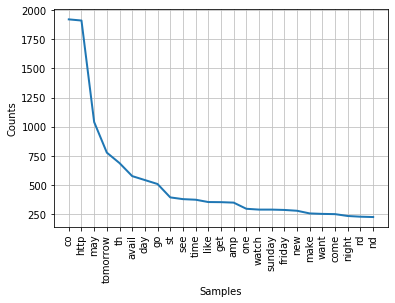

In [30]:
import nltk
import operator
Freq_dist_nltk=nltk.FreqDist(token_list1)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

"CO" , "http" , "may" , "tommorrow", "avail" are the maximum number of times occured words

From both WordCloud and Word Frequency we can infer that "CO" and "may" are the most occured words in the data

Modeling using Different Classifier

In [31]:
df.head()

,Tweet,Category
0,Not Available,negative
1,IOS 9 App Transport Security. Mm need to check...,neutral
2,"Mar if you have an iOS device, you should down...",neutral
3,@jimmie_vanagon my phone does not run on lates...,negative
4,Not sure how to start your publication on iOS?...,positive


In [32]:
df.iloc[5930:,]

,Tweet,Category
5930,Zlatan's 20th goal of the season not enough fo...,neutral
5931,Not Available,positive
5932,Scenes when Benzema walks out of tunnel tomorr...,positive
5933,Not Available,neutral
5934,@nananavy That &amp; Zlatan insisting on playi...,neutral
5935,Watching a replay of the PSG / Lille match fro...,negative
5936,@Jon_LeGossip Any truth to Galatasaray having ...,neutral
5937,@Paulkurth that 3rd shot looks like its from a...,neutral
5938,"@ACMilanNorway anyway, telling Zlatan he'll be...",negative
5939,7 more days till we start the campaign that wi...,positive


Lexicon Modeling

In [0]:
#Lexicon Modeling
df.dropna(inplace=True)

In [34]:
blank = []

for i,rev,cat in df.itertuples():
  if type(rev) == str:
    if rev.isspace():
      blanks.append(i)
blank

[]

In [35]:
df['Category'].value_counts()

positive    2888
neutral     2123
negative     956
Tweet          1
Name: Category, dtype: int64

Import Nltk vader Lexicon file for Lexicon Analysi

In [36]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
sid = SentimentIntensityAnalyzer()

In [0]:
a = "Not Available"

In [39]:
sid.polarity_scores(a)

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

Here we are checking the compond score of "a" , here compond=0.0 means negative

In [0]:
df['scores'] = df['Tweet'].apply(lambda Tweet: sid.polarity_scores(Tweet))

Similarly for all other tweets in the data frame

In [41]:
df.head()

,Tweet,Category,scores
0,Not Available,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,IOS 9 App Transport Security. Mm need to check...,neutral,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp..."
2,"Mar if you have an iOS device, you should down...",neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,@jimmie_vanagon my phone does not run on lates...,negative,"{'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp..."
4,Not sure how to start your publication on iOS?...,positive,"{'neg': 0.081, 'neu': 0.828, 'pos': 0.091, 'co..."


In [0]:
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [43]:
df.head()

,Tweet,Category,scores,compound
0,Not Available,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,IOS 9 App Transport Security. Mm need to check...,neutral,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",0.7650
2,"Mar if you have an iOS device, you should down...",neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,@jimmie_vanagon my phone does not run on lates...,negative,"{'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp...",-0.4019
4,Not sure how to start your publication on iOS?...,positive,"{'neg': 0.081, 'neu': 0.828, 'pos': 0.091, 'co...",0.0613


In [0]:
df['cmp_score'] = df['compound'].apply(lambda score: 'positive' if score > 0 else ('neutral' if score == 0 else 'negative'))

In [45]:
df.head()

,Tweet,Category,scores,compound,cmp_score
0,Not Available,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,IOS 9 App Transport Security. Mm need to check...,neutral,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",0.7650,positive
2,"Mar if you have an iOS device, you should down...",neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,@jimmie_vanagon my phone does not run on lates...,negative,"{'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp...",-0.4019,negative
4,Not sure how to start your publication on iOS?...,positive,"{'neg': 0.081, 'neu': 0.828, 'pos': 0.091, 'co...",0.0613,positive


In [0]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [47]:
accuracy_score(df['Category'],df['cmp_score'])

0.4812332439678284

USING VADER LEXICON MOELING; the model is 48.12 % accurate

In [48]:
print(classification_report(df['Category'],df['cmp_score']))

              precision    recall  f1-score   support

       Tweet       0.00      0.00      0.00         1
    negative       0.35      0.48      0.41       956
     neutral       0.41      0.38      0.39      2123
    positive       0.60      0.55      0.58      2888

    accuracy                           0.48      5968
   macro avg       0.34      0.36      0.34      5968
weighted avg       0.49      0.48      0.48      5968



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Affin Lexicon model

In [49]:
from google.colab import files
uploaded=files.upload()

Saving TweetSent.csv to TweetSent (1).csv


In [0]:
df1 = pd.read_csv('TweetSent.csv')

In [51]:
df1.head()

,Tweet,Category
0,Not Available,negative
1,IOS 9 App Transport Security. Mm need to check...,neutral
2,"Mar if you have an iOS device, you should down...",neutral
3,@jimmie_vanagon my phone does not run on lates...,negative
4,Not sure how to start your publication on iOS?...,positive


In [52]:
!pip install afinn

     |████████████████████████████████| 61kB 2.9MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp36-none-any.whl size=53453 sha256=ae602e75bfe90e9afe8d2cd6808d44b4d7d44b1223b6c695fb8902d26c8d0ffd
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [0]:
from afinn import Afinn
affin = Afinn()

In [0]:
afinn_scores = [affin.score(Tweet) for Tweet in df1.Tweet]
df1['afinn'] = afinn_scores

In [55]:
df1.head(10)

,Tweet,Category,afinn
0,Not Available,negative,0.0
1,IOS 9 App Transport Security. Mm need to check...,neutral,2.0
2,"Mar if you have an iOS device, you should down...",neutral,0.0
3,@jimmie_vanagon my phone does not run on lates...,negative,-2.0
4,Not sure how to start your publication on iOS?...,positive,2.0
5,"Two Dollar Tuesday is here with Forklift 2, Qu...",neutral,0.0
6,If you're not already signed up to test my iOS...,neutral,2.0
7,"YouTube Gaming Officially Launches On Web, And...",neutral,0.0
8,YouTube Gaming Launches Tomorrow with iOS and ...,neutral,0.0
9,@astrill Yashan from BBC @bbcchinese the VPN a...,neutral,1.0


In [0]:
df1['Affin_acore'] = df1['afinn'].apply(lambda score: 'positive' if score > 0 else ('neutral' if score == 0 else 'negative'))

In [57]:
df1.head()

,Tweet,Category,afinn,Affin_acore
0,Not Available,negative,0.0,neutral
1,IOS 9 App Transport Security. Mm need to check...,neutral,2.0,positive
2,"Mar if you have an iOS device, you should down...",neutral,0.0,neutral
3,@jimmie_vanagon my phone does not run on lates...,negative,-2.0,negative
4,Not sure how to start your publication on iOS?...,positive,2.0,positive


In [58]:
accuracy_score(df1['Category'],df1['Affin_acore'])

0.47670911528150134

USING AFFIN LEXICON MOELING; the model is 47.67 % accurate

Naive Bayes and Logistic regression Modeling

In [59]:
from google.colab import files
uploaded=files.upload()

Saving TweetSent.csv to TweetSent (2).csv


In [0]:
df2 = pd.read_csv('TweetSent.csv')

In [61]:
df2.head(5)

,Tweet,Category
0,Not Available,negative
1,IOS 9 App Transport Security. Mm need to check...,neutral
2,"Mar if you have an iOS device, you should down...",neutral
3,@jimmie_vanagon my phone does not run on lates...,negative
4,Not sure how to start your publication on iOS?...,positive


In [62]:
df2.shape

(5968, 2)

In [64]:
y = df2.iloc[:, 1].values
y

array(['negative', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [65]:
y.shape

(5968,)

In [0]:
corpus = []  
# 1000 (reviews) rows to clean 
for i in range(0, 5968):  
      
    # column : "Review", row ith 
    Tweet = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w:\/\/\S+)|[0-9]', ' ', df2['Tweet'][i])  
      
    # convert all cases to lower cases 
    Tweet = Tweet.lower()  
      
    # split to array(default delimiter is " ") 
    Tweet = Tweet.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
    # loop for stemming each word 
    # in string array at ith row     
    Tweet = [word for word in Tweet 
                if not word in set(stopwords.words('english'))]
                  
    # rejoin all string array elements 
    # to create back into a string 
    Tweet = ' '.join(Tweet)
      
    # append each string to create 
    # array of clean text  
    corpus.append(Tweet)

In [67]:
len(corpus)

5968

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
cv = CountVectorizer(max_features = 2000)

In [0]:
X = cv.fit_transform(corpus).toarray()

In [71]:
X.shape

(5968, 2000)

In [0]:
# Splitting the dataset into 
# the Training set and Test set 
from sklearn.model_selection import train_test_split

In [0]:
# experiment with "test_size" 
# to get better results 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [75]:
X_train.shape
y_train.shape

(4177, 2000)

(4177,)

In [0]:
clf = LogisticRegression()
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [77]:
classi = clf.fit(X_train,y_train)
nb_clss = nb.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
Clf_pred = classi.predict(X_test)
Nb_pred = nb_clss.predict(X_test)

In [79]:
accuracy_score(Clf_pred,y_test)

0.5415968732551647

Logistic Regression Modeling: the model is 54.16% accurate

In [80]:
accuracy_score(Nb_pred,y_test)

0.5577889447236181

Naive Bayes Modeling : the model is 55.78% accurate

SVM Classifier

In [0]:
import time
from sklearn import svm
from sklearn.metrics import classification_report

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [83]:
from google.colab import files
uploaded=files.upload()

Saving TweetSent.csv to TweetSent (3).csv


In [84]:
df3 = pd.read_csv('TweetSent.csv')
df3.head(5)

,Tweet,Category
0,Not Available,negative
1,IOS 9 App Transport Security. Mm need to check...,neutral
2,"Mar if you have an iOS device, you should down...",neutral
3,@jimmie_vanagon my phone does not run on lates...,negative
4,Not sure how to start your publication on iOS?...,positive


In [0]:
X = df3['Tweet']
y = df3['Category']

In [86]:
X.shape
y.shape

(5968,)

(5968,)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [88]:
X_train.shape
y_train.shape

(4177,)

(4177,)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [0]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()),
                    ('clf',LinearSVC())])

In [91]:
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [0]:
predictions = text_clf.predict(X_test)

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       Tweet       0.00      0.00      0.00         1
    negative       0.48      0.31      0.37       280
     neutral       0.51      0.42      0.46       649
    positive       0.63      0.78      0.69       861

    accuracy                           0.58      1791
   macro avg       0.40      0.38      0.38      1791
weighted avg       0.56      0.58      0.56      1791



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [95]:
accuracy_score(y_test,predictions)

0.5750977107761027

In [96]:
confusion_matrix(y_test,predictions)

array([[  0,   0,   1,   0],
       [  0,  86, 100,  94],
       [  0,  69, 273, 307],
       [  0,  25, 165, 671]])

SVM Modeling : the model is 57.1% accurate

Above comparison tells that SVC model is able to achieve 57 % accuracy and Lexicon able to get 48 %